# SOCIAL NETWORK ANALYSIS: CATCH ME IF YOU CAN

GROUP N - TEAM MEMBERS: SIMONE ANGELO MELI 289631, KEVIN WANG 289121, MAREK KMOCH 286021, FLORIAN NEUHAUS 286001, AHMET AKGUN 287241

## INTRODUCTION

The Social Network Analysis project focuses on the movie "Catch Me If You Can," a complex narrative with intricate character interactions. This analysis aims to unravel the underlying social structure using network analysis techniques, providing insights into the interconnectedness and relational dynamics of the characters.

The initial stages of the project involved constructing the network in Python, visualizing the graph, and calculating fundamental metrics like the number of nodes and edges, average degree, and density. These metrics offer an initial glimpse into the network's structure, indicating a moderate level of interconnectedness among nodes and a sparse graph, signifying that only a small fraction of possible connections are realized.

As the project progressed, we delved deeper, examining distances and diameters within the network. This approach aimed to understand the network's reachability and the efficiency of information flow among characters. The computation of average distance, average inverse distance and diameter provided valuable insights, revealing a rather tight network where individuals are closely knit in terms of social connections, a characteristic stemming from the central roles of Frank and Joe Shay, pivotal figures in the narrative. This tight-knit structure is evidenced by a low diameter and average shortest path length, underlining the network's small-world nature, characterized by efficient communication pathways and a closely connected social structure.

## WEEK 1


### Implementing the network in python

In [ ]:
#Import packages
import random # random generator
import networkx as nx # network
import matplotlib.pyplot as plt # drawing
import numpy as np # Matrices
import csv # Reading excel file
import json
import pandas as pd
import heapq
import time
from sklearn.metrics.cluster import normalized_mutual_info_score

#LOADING DATA

nodes_df = pd.read_csv("nodes.csv")
edges_df = pd.read_csv("edges.csv")
if isinstance(nodes_df[' viz'].iloc[0], str):
    nodes_df[' viz'] = nodes_df[' viz'].apply(lambda row: row.replace("'", '"')).apply(json.loads)

print(nodes_df)

    # index           label   movie_id  \
0         0  AGENT AMDURSKY        180   
1         1        AMDURSKY        180   
2         2          ASHLEY        180   
3         3      AUCTIONEER        180   
4         4       BARTENDER        180   
..      ...             ...        ...   
77       77       TWA PILOT        180   
78       78          WAITER        180   
79       79           WOMAN        180   
80       80        WOMAN #2        180   
81       81    YOUNG DOCTOR        180   

                                                  viz      vid  \
0   {'color': {'r': 95, 'g': 202, 'b': 190, 'a': 1...  1085250   
1   {'color': {'r': 95, 'g': 202, 'b': 190, 'a': 1...  1085225   
2   {'color': {'r': 255, 'g': 102, 'b': 0, 'a': 1....  1083840   
3   {'color': {'r': 255, 'g': 102, 'b': 0, 'a': 1....  1084908   
4   {'color': {'r': 255, 'g': 170, 'b': 51, 'a': 1...  1083480   
..                                                ...      ...   
77  {'color': {'r': 255, 'g': 102

### Drawing the graph

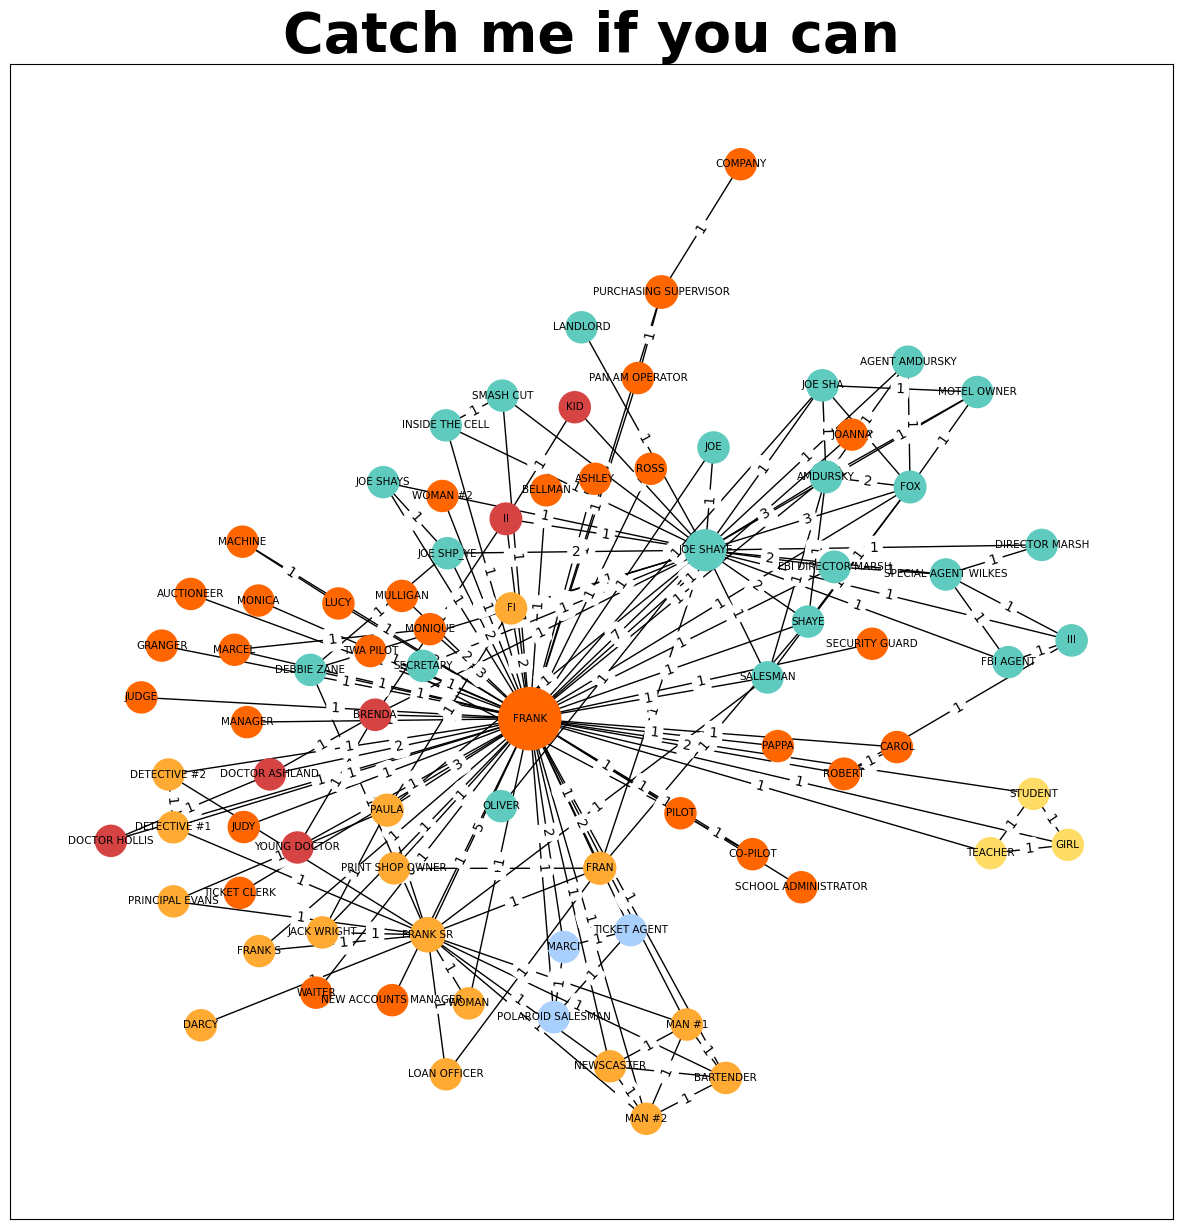

In [ ]:
class GraphVisualizer:

    @staticmethod
    def create_graph(nodes_data, edges_data):
        graph = nx.Graph()

        # Adding nodes
        for _, node_row in nodes_data.iterrows():
            idx, lbl, viz_info = node_row['# index'], node_row[' label'].strip(), node_row[' viz']
            graph.add_node(idx, label=lbl, viz=viz_info)

        # Adding edges
        for _, edge_row in edges_data.iterrows():
            source, target, edge_label, edge_weight = edge_row['# source'], edge_row[' target'], edge_row[' label'], edge_row[' weight']
            graph.add_edge(source, target, label=edge_label, weight=edge_weight)

        return graph

    @staticmethod
    def get_adjacency_list(graph):
        adjacency_list = {n: list(graph.neighbors(n)) for n in graph.nodes()}
        return adjacency_list

    @staticmethod
    def extract_visual_attributes(graph):
        visual_attributes = {
            "positions": {n: (attr['viz']['position']['x'], attr['viz']['position']['y']) for n, attr in graph.nodes(data=True)},
            "colors": [(attr['viz']['color']['r']/255, attr['viz']['color']['g']/255, attr['viz']['color']['b']/255, attr['viz']['color']['a']) for n, attr in graph.nodes(data=True)],
            "sizes": [attr['viz']['size'] * 100 for n, attr in graph.nodes(data=True)],
            "labels": {n: attr['label'] for n, attr in graph.nodes(data=True)}
        }
        return visual_attributes

    @staticmethod
    def visualize_graph(graph, visual_attributes):
        plt.figure(figsize=(15, 15))
        nx.draw_networkx_nodes(graph, pos=visual_attributes['positions'], node_color=visual_attributes['colors'], node_size=visual_attributes['sizes'])
        nx.draw_networkx_edges(graph, pos=visual_attributes['positions'])
        nx.draw_networkx_labels(graph, pos=visual_attributes['positions'], labels=visual_attributes['labels'], font_size=7.5)

        weights = {(n1, n2): attr['weight'] for n1, n2, attr in graph.edges(data=True)}
        nx.draw_networkx_edge_labels(graph, pos=visual_attributes['positions'], edge_labels=weights)

        plt.title('Catch me if you can', size=40, weight='bold')
        plt.show()

# Usage
G = GraphVisualizer.create_graph(nodes_df, edges_df)
visual_attributes = GraphVisualizer.extract_visual_attributes(G)

adj_list = GraphVisualizer.get_adjacency_list(G)

GraphVisualizer.visualize_graph(G, visual_attributes)

### Number of nodes

In [ ]:
num_nodes = G.number_of_nodes()
print(F"The number of nodes is {num_nodes}")


The number of nodes is 82


### Number of edges

In [ ]:
num_edges = G.number_of_edges()
print(F"The number of edges is {num_edges}")

The number of edges is 162


### Average degree

In [ ]:
def myAverageDegree2(G):
    c=0
    N=G.number_of_nodes()
    for n in G.nodes(): # go over every node
        c=c+G.degree(n) # add the degree of node n

    e=c/N # normalize
    return e

In [ ]:
k=myAverageDegree2(G)
print(f"The average degree is {k}")

The average degree is 3.951219512195122


Moderate average degree, indicating some level of interconnectedness among nodes.

### Density

In [ ]:
def myDensity(G):
    N=G.number_of_nodes()
    c=myAverageDegree2(G)/(N-1)
    return c

In [ ]:
myd = myDensity(G)
print(f"The density of the graph is {myd}")

The density of the graph is 0.04878048780487805


A density close to 0 indicates a sparse graph, meaning that only a small fraction of possible edges actually exist in the graph.

## Week 2

In week 2 we decided to focus on the distances and diameter. We will first examine the average distance and diameter of the graph and then we will improve the given function for computing the inverse distance function.

### a) Computing Average Distance and Diameter

https://networkx.org/documentation/stable/reference/algorithms/distance_measures.html

In [ ]:
#get the diameter with netowrk x of Catch me if you can
print(f"The diameter of the graph is {nx.diameter(G)}")

The diameter of the graph is 4


A diameter of 4 suggests a rather tight network where where individuals are close to one another in terms of social connections. This makes intuitive sense, as Frank and Joe Shay serve as a central connection to every group in the social network, due to the story evolving around them.

In [ ]:
#get the average length with network x of Catch me if you can
print(f"The average distance of the graph is {nx.average_shortest_path_length(G)}")

The average distance of the graph is 2.183378500451671


 An average shortest path length (or average distance) of 2.18 suggests a tightly connected structure with efficient pathways for communication and interaction. It highlights the small-world nature of the network, as the graph has a relatively low diameter and low average shortest path lenght. It also implies the presence of influential nodes that play a crucial role in the network's connectivity, which is explained in the comment above.

### b) Computing Inverse distance

We will define a series of two functions to compute the average-inverse distance.

We first define a function computing the inverse distance between two nodes (without using any networkx functions). We use the convention that if there is no path then the inverse distance is equal to 0.

Then we provide a second function doing an average of this inverse distances.

In [ ]:
def inverse_distance(G, i, j):
    if i == j:
        return float('inf')

    # Initialize a queue for BFS and a set to track visited nodes
    queue = [(i, 0)]  # Queue containing tuples of (node, distance)
    visited = set([i])  # Add the starting node to visited

    while queue:
        current_node, distance = queue.pop(0)  # Dequeue a node and its distance

        if current_node == j:
            return 1 / distance

        # Explore the neighbors of the current node
        for neighbor in G.neighbors(current_node):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, distance + 1))

    # Return 0 if no path is found
    return 0

In [ ]:
def average_inverse(G): # take in entry a graph
    N=G.number_of_nodes()  #  N is number of nodes

    Temp_sum=0   # we will sum progressively all the distance

    for i in range(N):
        for j in range(i+1,N): # go over all pair of nodes
            Temp_sum=Temp_sum+inverse_distance(G,i,j)

    if Temp_sum==0: # Handle the case where there is no edges at all
        Result='No edges'
    else:
        Temp=(Temp_sum)/(N*(N-1)/2)
        Result=1/Temp
    return Result  # function return the graph G, G is also an internal name

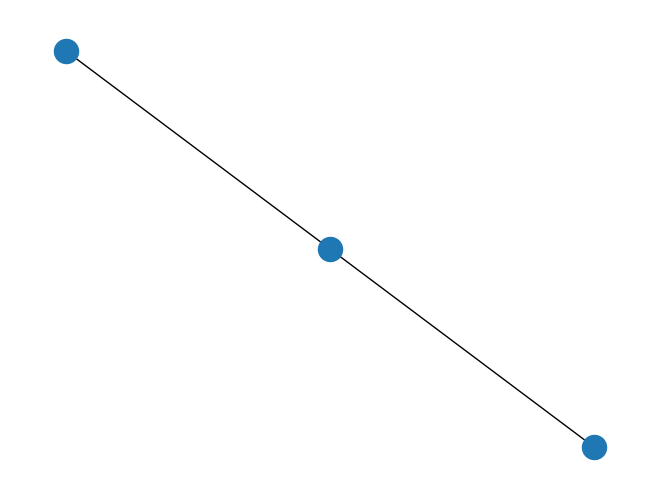

1.2

In [ ]:
# Sanity check: check if the function work on simple graph
#where we can check what is happening.

T=nx.graph_atlas(6)
nx.draw(T)
plt.show()
average_inverse(T)

As shown by the small test graph, the function works. (1 + 1 + 1/2 = 2.5; 2.5/3; and then the inverse of that = 1.2)

In [ ]:
#test
print(f"The average inverse distance is equal to {average_inverse(G)}")

The average inverse distance is equal to 2.056452861344778


An average inverse distance of 2.0565, which is a relatively high value, suggests a highly interconnected structure with an emphasis on close, direct connections. It reflects a network with strong local clusters and a high degree of overall connectivity. Such a network suggests efficient communication and rapid propagation of information.

We hypothesise, by examining the social network graph above, that this is due to the role of central figures like Frank and Joe Shay in connecting the different clusters. Their positions within the network may serve as vital bridges linking various subgroups. While the graph's structure visually implies this, a more detailed analysis involving computation of clusters and centralities will be conducted further down the line to confirm this statement.

## WEEK 3

### Computing the Betweeness Centrality notion

In [ ]:
def betweenness_centrality_node(G, j): #initialize a function to check the betweeness centrality between a pair of nodes
    nodes = list(G.nodes())
    betweenness = 0.0

    for source in nodes: #check every possible pathway
        for target in nodes:
            if source != target: #only if the two nodes aren't the same
                all_shortest_paths = list(nx.all_shortest_paths(G, source, target)) #create a list of shorest paths using the nx library
                total_paths = len(all_shortest_paths) #calculate the lenght of all the shortest paths, as the formula the value in the denominator
                count = sum([1 for path in all_shortest_paths if j in path]) #calculate the amount of shortest paths passing through node j (used in numerator)
                betweenness += count / total_paths #calculate the betweeness

    betweenness = betweenness / ((G.number_of_nodes() - 1) * (G.number_of_nodes() - 2)) #normalize the value so we get a common scale

    return betweenness

N_SNA = G.number_of_nodes()
data_centralities = [] #create a list where every betweeness centrality will be stored

for i in list(G.nodes()):
    data_centralities.append(betweenness_centrality_node(G, i)) #append every value to the list


value_max = max(data_centralities) #find the max value in the betweeness centrality list
index_max = data_centralities.index(value_max) #find max index, so we can output the actual name and not a numerical value
name_max = G.nodes[index_max]['label'] #use the 'label' column value as that is the corresponding name of the max index

print(f"The most central character based on betweenness centrality is {name_max} with a centrality of {value_max}.")


The most central character based on betweenness centrality is FRANK with a centrality of 0.8639917695473258.


### Explaining the result and the notion choice

Frank is the main character of the movie "Catch Me If You Can" and acts as many different people that occupy different professions.
The Betweenness centrality notion highlights "how important a node is in terms of connecting other nodes", so that one can see how interconnected all of the characters are and how many different "lives" Frank managed to live at the same time as a con-artist.
Choosing betweenness centrality allows us to visualize and quantify Frank's role in this network of relationships. It's not just about the number of people he interacts with, but the crucial connections he establishes between different regions of the network. Understandably, the most central character based on betweenness centrality is FRANK with a centrality of 0.8639917695473258.

### Cumulative distribution & Graphical representation

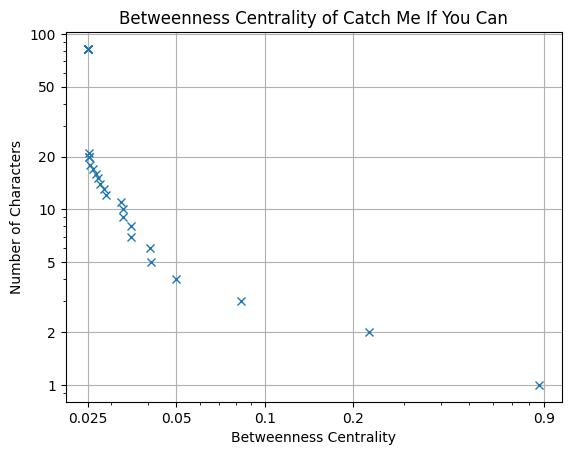

In [ ]:
#A logarithmic graphical representation is the most suitable, as the values are very spaced out and only a very few have a large betweenness centrality, while most don't, representing a logarithmic curve.
#the betweenness centrality is


data_centralities.sort()
cdf_x=data_centralities

cdf_y=[]

for x in cdf_x:
    y=sum(test>=x for test in data_centralities)
    cdf_y.append(y)
plt.semilogx(cdf_x, cdf_y, "x")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Characters")
plt.title("Betweenness Centrality of Catch Me If You Can")


#then we add labels and grids to make it more readable
plt.grid(True)

#for x-axis:
grids_x = [0.025,0.05, 0.1, 0.2,0.9]
labels_x = [str(loc) for loc in grids_x]
plt.xticks(grids_x, labels_x)

#for y-axis:
plt.yscale('log') #we make it logarithmically as well to make the values more readable
grids_y = [1, 2, 5, 10, 20, 50, 100]
labels_y = [str(loc) for loc in grids_y]
plt.yticks(grids_y, labels_y)

plt.show()


  We displayed betweenness centrality for characters in "Catch Me If You Can," where the x-axis shows the centrality on a logarithmic scale to accommodate the wide variance in values, and the y-axis shows the count of characters. Most characters cluster at the lower end of the centrality spectrum, indicating they have fewer interactions, while a few outliers on the right signify central characters with many interactions, likely the main characters who are pivotal in the movie's plot. As we expected frank has the most centrality with 0.8639917695473258.







## WEEK 5

### Building the PangeRank function

In [ ]:
from collections import OrderedDict

def compute_pagerank(graph, alpha=0.85, tol=1e-6):

    """
    -graph: An adjacency list representation of the graph in the form {0: [1, 2], 1: [2], 2: [0, 1]}
    -alpha: The damping factor (default=0.85)
    -tol: Tolerance to check for convergence (default=1e-6)
    """

    # Ensure that the graph is treated as unweighted and directed
    directed_graph = {}
    for node, neighbors in graph.items():
        directed_graph.setdefault(node, [])
        for neighbor in neighbors:
            directed_graph[node].append(neighbor)
            directed_graph.setdefault(neighbor, [])
            directed_graph[neighbor].append(node)

    num_nodes = len(directed_graph)

    # Initialize PageRank value for each node
    pagerank = {node: 1.0 / num_nodes for node in directed_graph}

    # Initialize the iteration counter
    global num_iterations_pg_function
    num_iterations_pg_function = 0

    # PageRank computation
    while True:
        prev_pagerank = pagerank.copy()
        for node in directed_graph:
            local_pr = 0.0
            for neighbor in directed_graph[node]:
                local_pr += prev_pagerank[neighbor] / len(directed_graph[neighbor])
            pagerank[node] = alpha/num_nodes + (1-alpha) * local_pr

        # Increment the iteration counter
        num_iterations_pg_function += 1

        # Check for convergence
        err = sum(abs(pagerank[node] - prev_pagerank[node]) for node in directed_graph)
        if err < num_nodes * tol:
            break

    # Create an OrderedDict with sorted keys
    sorted_keys_pagerank = OrderedDict(sorted(pagerank.items()))
    regular_dict = dict(sorted_keys_pagerank)

    return regular_dict

The function above computes the PageRank of each node in a graph and returns a dictionary of nodes with their corresponding PageRank.

### Computing the PageRank with alpha=0.15

In [ ]:
pr = compute_pagerank(adj_list, 0.15)
print(f"The number of iterations is {num_iterations_pg_function}, while the PageRank for each node is {pr}")

The number of iterations is 19, while the PageRank for each node is {0: 0.008366447881702311, 1: 0.020159736662700975, 2: 0.004390523589693654, 3: 0.004390523589693654, 4: 0.013613587424229889, 5: 0.004390523589693654, 6: 0.014980755471079741, 7: 0.007225746323911974, 8: 0.007422104732630039, 9: 0.005294889245481177, 10: 0.004109127330933324, 11: 0.011399533242139267, 12: 0.009307760744007984, 13: 0.009307760744007984, 14: 0.006561251941273, 15: 0.010008701869561468, 16: 0.007226409725119838, 17: 0.009106255692991434, 18: 0.009122507238283728, 19: 0.009024476452860098, 20: 0.020159736662700975, 21: 0.01682551115346575, 22: 0.20190846157714212, 23: 0.006670382627944051, 24: 0.04560115153121765, 25: 0.010132759600017683, 26: 0.004390523589693654, 27: 0.012010500687463083, 28: 0.011976595876413665, 29: 0.0092707804837027, 30: 0.009050925823306103, 31: 0.004390523589693654, 32: 0.006643933257498046, 33: 0.013181712671198645, 34: 0.07423718640526868, 35: 0.00911967420388887, 36: 0.011650656

The result is a dictionary containing the corresponding PageRank for each node when the parameter alpha=0.15 and the number of iterations that takes the function to converge equal to 19.

### Comparing the results with the NetworkX function

In [ ]:
import scipy as sp

# PageRank scores computation: careful alpha in nx.pagerank is 1-alpha in the slides
pr_nx = nx.pagerank(G, alpha=0.85) # returns a dictionary
print(pr_nx)


{0: 0.007013198294580523, 1: 0.022029554945055575, 2: 0.0038687075875165214, 3: 0.0038687075875165214, 4: 0.011796145442644228, 5: 0.0038687075875165214, 6: 0.01861803751313391, 7: 0.0061226122011679394, 8: 0.006539989987060084, 9: 0.004965196916165868, 10: 0.003740375250168856, 11: 0.009490632653063415, 12: 0.008065020481970128, 13: 0.008065020481970128, 14: 0.005466153222295659, 15: 0.010477066878712842, 16: 0.006095203668670612, 17: 0.007561691087449172, 18: 0.009285219073377595, 19: 0.009592276576674446, 20: 0.022029554945055575, 21: 0.014342935185057437, 22: 0.22315514629665534, 23: 0.005779814545002451, 24: 0.0494622419774835, 25: 0.008928726027465621, 26: 0.0038687075875165214, 27: 0.01006970280973901, 28: 0.00986241530155109, 29: 0.007881420576891774, 30: 0.007684317683078439, 31: 0.0038687075875165214, 32: 0.005648334143764864, 33: 0.010937861543014283, 34: 0.09212612882338052, 35: 0.007579525695577485, 36: 0.013631723232326873, 37: 0.0038687075875165214, 38: 0.003868707587516

By visual inspection, we can notice that some of the values are slightly different. For example:

- For node 0, we have 0.008366447881702311 vs 0.007013198294580523.
- For node 22, the difference is larger: 0.20190846157714212 vs 0.22315514629665534.
- For node 34, we also see a significant difference: 0.07423718640526868 vs 0.09212612882338052.

These differences indicate that the scores are not exactly equal, but it's important to keep in mind that both functions gives approximations as a result


### Highest PageRank

In [ ]:
list_of_names = []
for n in range (0, len(G.nodes)):
    list_of_names.append(G.nodes[n]['label'])


In [ ]:
# Separately save the values of the dictionary
pr_values = pr.values()

# Node with highest value of PageRank

value_max = max(pr_values)
index_max = list(pr_values).index(value_max)
name_max = list_of_names[index_max]
print('The node with the highest PageRank is: ' + name_max + '!')

The node with the highest PageRank is: FRANK!


The result is the same we obtained using the Betweeness centrality notion in week 3. We can investigate further plotting all the scores of the PageRank for each node

### Comparing with the Betweeness centrality (week 3)

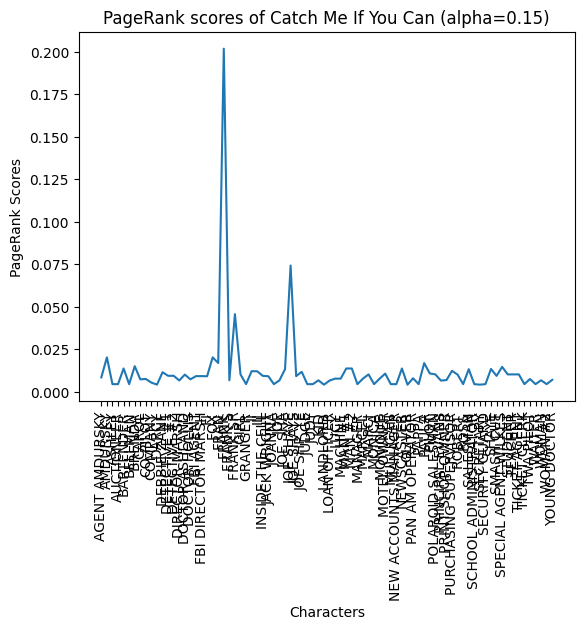

In [ ]:
# Plot the PageRank scores
plt.xticks(rotation = 90)
pagerank_centralities=list(pr.values())

plt.ylabel("PageRank Scores")
plt.xlabel("Characters")
plt.title("PageRank scores of Catch Me If You Can (alpha=0.15)")

plt.plot(list_of_names, pagerank_centralities)

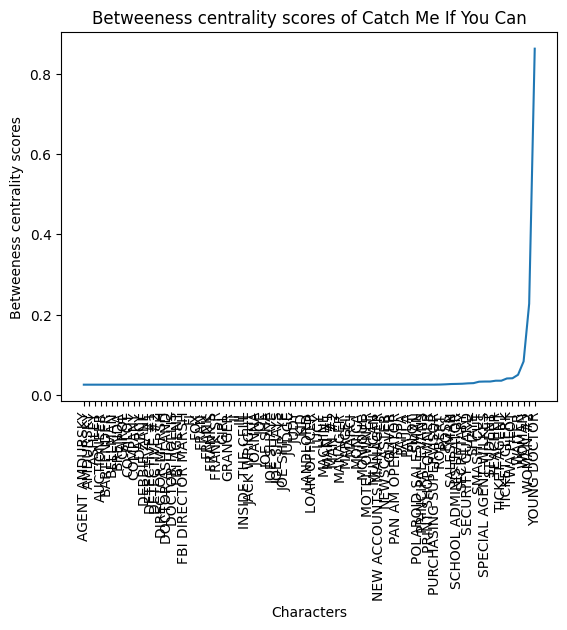

In [ ]:
# Plot the betweeness centrality scores from week 3
plt.xticks(rotation = 90)

plt.ylabel("Betweeness centrality scores")
plt.xlabel("Characters")
plt.title("Betweeness centrality scores of Catch Me If You Can")

plt.plot(list_of_names, data_centralities)


Both measures indicate that there are important nodes (Frank in particular) within the network, but the shape of the distributions implies that their roles might be different. The PageRank suggests a few influential nodes, whereas the Betweenness Centrality indicates that there are even fewer but more critical nodes that act as bridges.

**Please note** that this graph represents the scores and not the cumulative distribution, that is shown below.


### Cumulative Distribution & Comparison

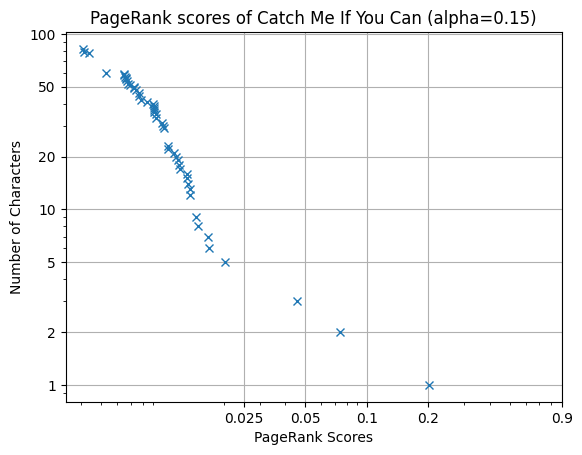

In [ ]:
# Cumulative distribution for the PageRank
list_values=list(set(pagerank_centralities)) # get the list of values without repetition
list_values.sort() #sort them in increasing order
cdf_x=list_values #these are the values where the cdf change

cdf_y=[] # list of y-axis
for x in cdf_x: # check each value
    y=sum(test>=x for test in pagerank_centralities) # count how many element in data_centralities are above it
    cdf_y.append(y) # add it to the list


#A logarithmic graphical representation is the most suitable, as the values are very spaced out and only a very few have a large betweenness centrality, while most don't, representing a logarithmic curve.
#the betweenness centrality is

plt.semilogx(cdf_x, cdf_y, "x")
plt.xlabel("PageRank Scores")
plt.ylabel("Number of Characters")
plt.title("PageRank scores of Catch Me If You Can (alpha=0.15)")


#then we add labels and grids to make it more readable
plt.grid(True)

#for x-axis:
grids_x = [0.025,0.05, 0.1, 0.2,0.9]
labels_x = [str(loc) for loc in grids_x]
plt.xticks(grids_x, labels_x)

#for y-axis:
plt.yscale('log') #we make it logarithmically as well to make the values more readable
grids_y = [1, 2, 5, 10, 20, 50, 100]
labels_y = [str(loc) for loc in grids_y]
plt.yticks(grids_y, labels_y)

plt.show()

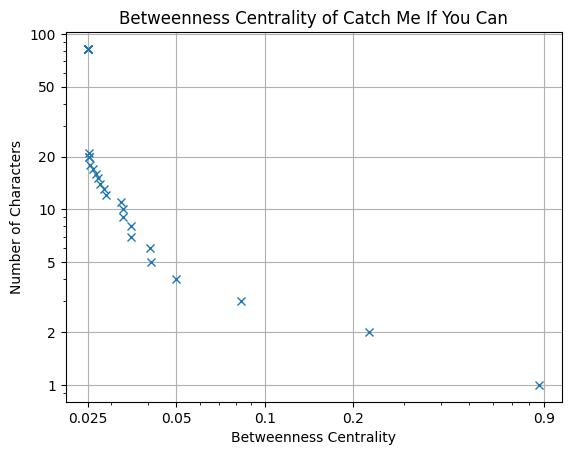

Both graphs show a similar pattern where most nodes have low centrality scores, and a few nodes have very high scores. This is indicative of a network where most nodes are not central, but there are key nodes that are vital either for their influence (PageRank) or control over information flow (betweenness).



### Computing the PageRank with alpha = 0.5

In [ ]:
pr_2 = compute_pagerank(adj_list, 0.5)
print(f"The number of iterations is {num_iterations_pg_function}, while the PageRank for each node is {pr}")

The number of iterations is 10, while the PageRank for each node is {0: 0.008366447881702311, 1: 0.020159736662700975, 2: 0.004390523589693654, 3: 0.004390523589693654, 4: 0.013613587424229889, 5: 0.004390523589693654, 6: 0.014980755471079741, 7: 0.007225746323911974, 8: 0.007422104732630039, 9: 0.005294889245481177, 10: 0.004109127330933324, 11: 0.011399533242139267, 12: 0.009307760744007984, 13: 0.009307760744007984, 14: 0.006561251941273, 15: 0.010008701869561468, 16: 0.007226409725119838, 17: 0.009106255692991434, 18: 0.009122507238283728, 19: 0.009024476452860098, 20: 0.020159736662700975, 21: 0.01682551115346575, 22: 0.20190846157714212, 23: 0.006670382627944051, 24: 0.04560115153121765, 25: 0.010132759600017683, 26: 0.004390523589693654, 27: 0.012010500687463083, 28: 0.011976595876413665, 29: 0.0092707804837027, 30: 0.009050925823306103, 31: 0.004390523589693654, 32: 0.006643933257498046, 33: 0.013181712671198645, 34: 0.07423718640526868, 35: 0.00911967420388887, 36: 0.011650656

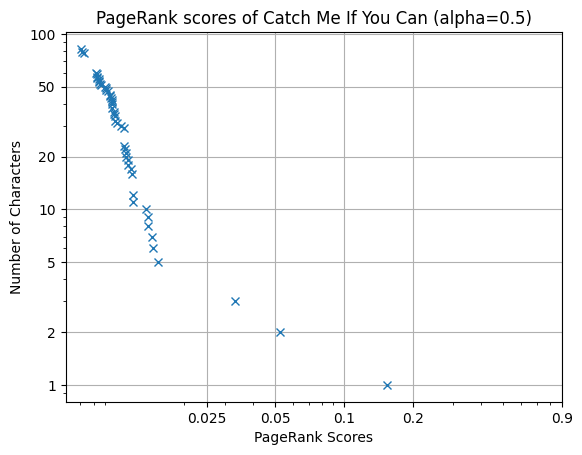

In [ ]:
pagerank_centralities=list(pr_2.values()) # for PageRank with alpha=0.5


# Cumulative distribution for the PageRank
list_values=list(set(pagerank_centralities)) # get the list of values without repetition
list_values.sort() #sort them in increasing order
cdf_x=list_values #these are the values where the cdf change


cdf_y=[] # list of y-axis
for x in cdf_x: # check each value
    y=sum(test>=x for test in pagerank_centralities) # count how many element in data_centralities are above it
    cdf_y.append(y) # add it to the list

plt.semilogx(cdf_x, cdf_y, "x")
plt.xlabel("PageRank Scores")
plt.ylabel("Number of Characters")
plt.title("PageRank scores of Catch Me If You Can (alpha=0.5)")


#then we add labels and grids to make it more readable
plt.grid(True)

#for x-axis:
grids_x = [0.025,0.05, 0.1, 0.2,0.9]
labels_x = [str(loc) for loc in grids_x]
plt.xticks(grids_x, labels_x)

#for y-axis:
plt.yscale('log') #we make it logarithmically as well to make the values more readable
grids_y = [1, 2, 5, 10, 20, 50, 100]
labels_y = [str(loc) for loc in grids_y]
plt.yticks(grids_y, labels_y)

plt.show()

The first output converges after 19 iterations, while the second one converges after 10 iterations. This suggests that a higher damping factor (alpha=0.5) may lead to faster convergence in this particular case.

The PageRank scores for each node will generally be higher when alpha is lower (because there's less 'random jumping'), which can be seen in some of the scores. For instance, node 22 (Frank) has a score of 0.20190846157714212 with alpha 0.15, but a much lower score of 0.15455510336392667 with alpha 0.5. This reflects the higher likelihood of random jumps with a higher alpha, spreading the 'rank' more evenly across nodes.

With a lower alpha, rank tends to concentrate more on nodes with higher connectivity (those with more links or stronger link weights). With a higher alpha, this concentration is less pronounced, and the rank is distributed more evenly across the network.



## WEEK 6

#### 0. Preparing Graph by checking if the graph is connected and deleting potential loops

In [ ]:
print(nx.is_connected(G))

True


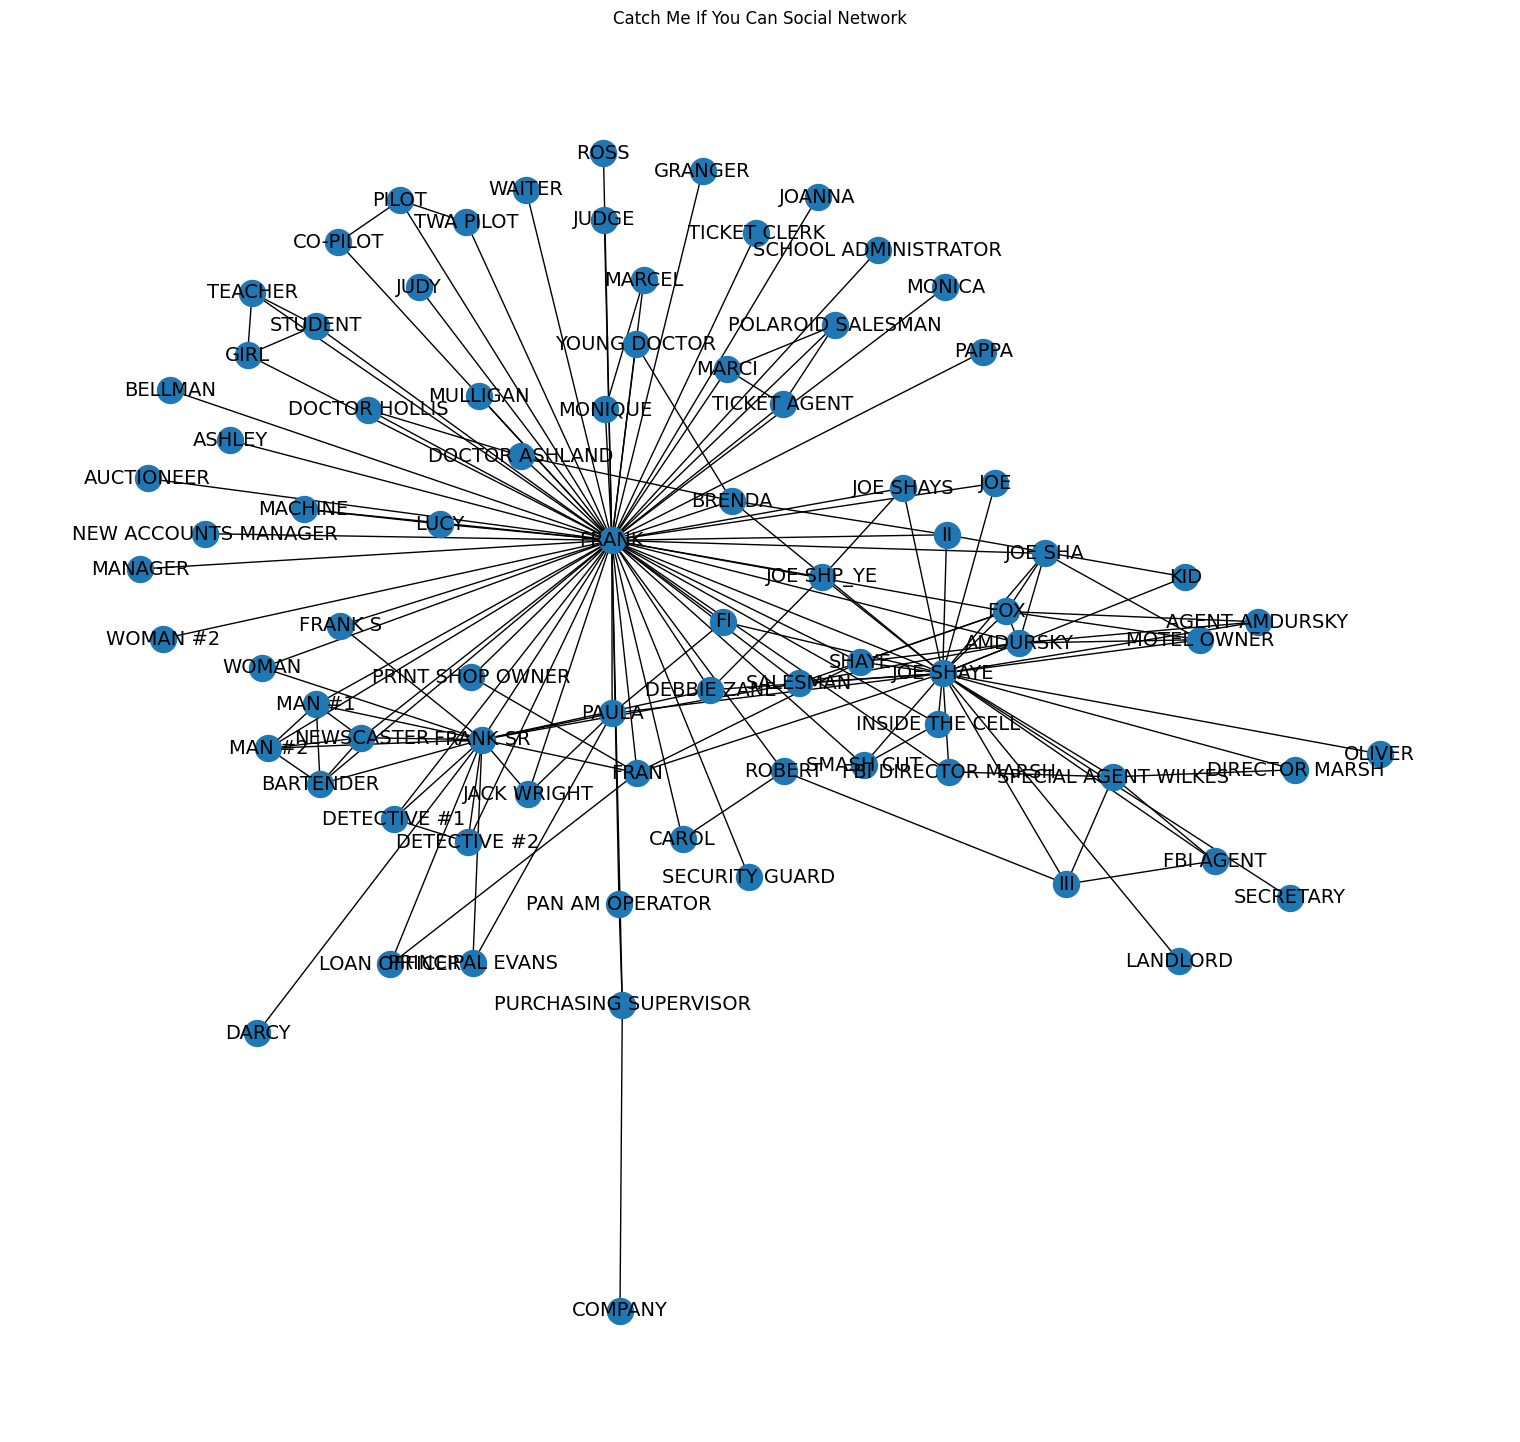

In [ ]:
# Remove self-loops for following clustering detection methods
G.remove_edges_from(nx.selfloop_edges(G))



# Plot the resulting graph
# Drawing the graph with node labels
plt.figure(figsize=(15, 14))
pos = nx.spring_layout(G, seed=20)  # Layout for the nodes
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=350, font_size=14)
plt.title("Catch Me If You Can Social Network")
plt.show()

### 1. Community Detection


#### Bridge Removal

We implement the bridge removal method using the Girvan-Newman algorithm. Since this returns a hierarchy of partitions, we select the one maximizing the modularity.

In [ ]:
def bridge_removal(G):

    partitions = nx.community.girvan_newman(G)

    modularity_br = float("-inf")
    best_partition = set()
    # Compute the modularity of each partition
    for partition in partitions:
        modularity = nx.community.quality.modularity(G, partition)
        if modularity > modularity_br:
            modularity_br = modularity
            best_partition = partition
    #to make it more compareable to the other methods, we transform it into a list of frozensets
    partition_br = [frozenset(p) for p in best_partition]
    return modularity_br, partition_br

# Start timing for measuring the comoutational time of the algorithm
start_time = time.time()

#calling the function
modularity_br, partition_br = bridge_removal(G)

# End timing
end_time = time.time()

# Calculate the difference
elapsed_time_br = end_time - start_time




print(f"best partition found: {partition_br}")
print(f"the modularity of the partition: {modularity_br}")

best partition found: [frozenset({0, 1, 66, 68, 70, 71, 11, 19, 20, 27, 29, 32, 33, 34, 35, 36, 39, 40, 51, 55}), frozenset({2, 3, 5, 8, 22, 25, 26, 31, 37, 38, 42, 43, 46, 47, 48, 49, 50, 52, 53, 57, 59, 60, 65, 67, 69, 73, 74, 75, 76, 77, 78, 80}), frozenset({4, 10, 44, 45, 12, 13, 79, 54, 23, 24}), frozenset({16, 81, 6, 15}), frozenset({64, 17, 18, 7, 72, 28, 14}), frozenset({56, 9, 63}), frozenset({41, 21, 62}), frozenset({58, 61, 30})]
the modularity of the partition: 0.34714999999999996


### Modularity Optimization


Here, we directly maximize the modularity, and to do so we employ Newman's greedy algorithm.

In [ ]:
# Modularity optimization

def modularity_optimization(Graph):
  partition_mo = nx.community.greedy_modularity_communities(Graph)
  modularity_mo = nx.community.quality.modularity(Graph, partition_mo)

  return modularity_mo, partition_mo


# Start timing
start_time = time.time()

modularity_mo, partition_mo = modularity_optimization(G)

# End timing
end_time = time.time()

# Calculate the difference
elapsed_time_mo = end_time - start_time

print(f"the partition found: {partition_mo}")
print(f"the modularity of the partition: {modularity_mo}")

the partition found: [frozenset({64, 65, 2, 67, 3, 69, 5, 7, 8, 76, 77, 78, 15, 16, 80, 22, 26, 31, 37, 38, 42, 43, 46, 47, 49, 50, 52, 53, 57, 59}), frozenset({68, 6, 71, 72, 11, 14, 17, 18, 81, 27, 28, 29, 32, 34, 35, 36, 39, 40, 55}), frozenset({4, 10, 12, 13, 79, 19, 21, 23, 24, 30, 41, 44, 45, 54, 58, 61, 62}), frozenset({0, 1, 33, 51, 20, 66, 70}), frozenset({56, 9, 63}), frozenset({73, 25, 74}), frozenset({48, 75, 60})]
the modularity of the partition: 0.3631375


### Label Propagation

In [ ]:


#call functions
def label_propagation(Graph):
  communities = nx.community.asyn_lpa_communities(Graph)
  partition_lp = [frozenset(c) for c in communities]
  modularity_lp = nx.community.quality.modularity(Graph, partition_lp)

  return modularity_lp, partition_lp

# Start timing
start_time = time.time()

#call function
modularity_lp, partition_lp = label_propagation(G)

# End timing
end_time = time.time()

# Calculate the difference
elapsed_time_lp = end_time - start_time



print(f"the partition found: {partition_lp}")
print(f"the modularity of the partition: {modularity_lp}")


the partition found: [frozenset({0, 1, 66, 68, 70, 72, 14, 17, 18, 20, 28, 33, 34, 40, 51, 55}), frozenset({2, 3, 5, 7, 8, 9, 11, 19, 21, 22, 26, 27, 30, 31, 32, 35, 36, 37, 38, 39, 42, 43, 46, 49, 52, 53, 56, 57, 58, 59, 62, 63, 64, 65, 67, 69, 76, 77, 78, 79, 80}), frozenset({4, 41, 10, 12, 13, 44, 45, 54, 23, 24, 61}), frozenset({16, 81, 6, 15}), frozenset({73, 25, 74}), frozenset({29, 71}), frozenset({50, 47}), frozenset({48, 75, 60})]
the modularity of the partition: 0.32637499999999997


### 2. Result Comparison

First we calculate the criterion for each method, then we will summarize them in a table

#### 1. Number of Detected Clusters

In [ ]:
br_clusters = len(partition_br)
mo_clusters = len(partition_mo)
lp_clusters = len(partition_lp)

print(f"number of clusters in partition of Bridge Removal: {br_clusters}")
print(f"number of clusters in partition of Modularity Optimization: {mo_clusters}")
print(f"number of clusters in partition of Label Propagation: {lp_clusters}")

number of clusters in partition of Bridge Removal: 8
number of clusters in partition of Modularity Optimization: 7
number of clusters in partition of Label Propagation: 8


#### 2. Cluster Size Distribution

In [ ]:
def cluster_size_distribution(frozensets_list):
    size_distribution = {}
    for fs in frozensets_list:
        size = len(fs)
        if size in size_distribution:
            size_distribution[size] += 1
        else:
            size_distribution[size] = 1
    return size_distribution

cs_dis_br = cluster_size_distribution(partition_br)
cs_dis_mo = cluster_size_distribution(partition_mo)
cs_dis_lp = cluster_size_distribution(partition_lp)

print("Cluster Size Distribution of Bridge Removal:")
for size, count in cs_dis_br.items():
    print(f"Sets of size {size}: {count}")

print("Cluster Size Distribution of Modularity Optimization:")
for size, count in cs_dis_mo.items():
    print(f"Sets of size {size}: {count}")

print("Cluster Size Distribution of Label Propagation:")
for size, count in cs_dis_lp.items():
    print(f"Sets of size {size}: {count}")

Cluster Size Distribution of Bridge Removal:
Sets of size 20: 1
Sets of size 32: 1
Sets of size 10: 1
Sets of size 4: 1
Sets of size 7: 1
Sets of size 3: 3
Cluster Size Distribution of Modularity Optimization:
Sets of size 30: 1
Sets of size 19: 1
Sets of size 17: 1
Sets of size 7: 1
Sets of size 3: 3
Cluster Size Distribution of Label Propagation:
Sets of size 16: 1
Sets of size 41: 1
Sets of size 11: 1
Sets of size 4: 1
Sets of size 3: 2
Sets of size 2: 2


#### 3. Compuational Time

In [ ]:
print(f"Compuational Time of Bridge Removal: {str(elapsed_time_br)}s")
print(f"Compuational Time of Modularity Optimization: {str(elapsed_time_mo)}s")
print(f"Compuational Time of Label Propagation: {str(elapsed_time_lp)}s")

Compuational Time of Bridge Removal: 2.8284451961517334s
Compuational Time of Modularity Optimization: 0.02929854393005371s
Compuational Time of Label Propagation: 0.006585836410522461s


#### 4. Modularity

In [ ]:
print(f"Modularity of Bridge Removal: {modularity_br}")
print(f"Modularity of Modularity Optimization: {modularity_mo}")
print(f"Modularity of Label Propagation: {modularity_lp}")

Modularity of Bridge Removal: 0.34714999999999996
Modularity of Modularity Optimization: 0.3631375
Modularity of Label Propagation: 0.32637499999999997


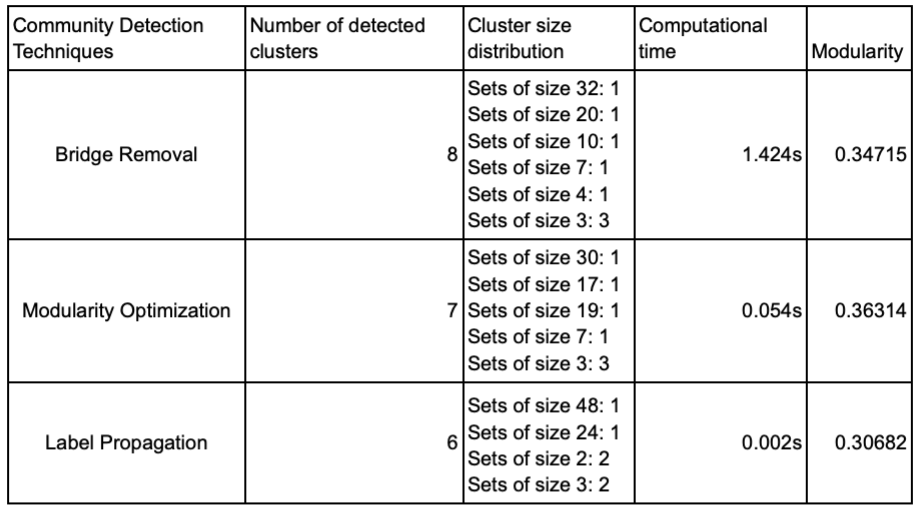

We will now compare the outcomes of the three techniques and then decide which one is most appropriate for our purposes and the social network.


For each technique the number of detected clusters are different, this depicts how many communities are identified in the network by the algorithm.
The difference in detected clusters seen suggests how Bridge Removal, with the highest number of detected clusters, is the most sensitive out of the three techniques, meaning that it is more susceptible to detect subtler differences between gorups. This can be beneficial as it is potentially capturing finer details in the community structure, but which on the other hand also means that it is less robust to noise in the network. If we take a look at the cluster size distribution, there are three sets with size 3 and another one of size 4, which indicates that the Bridge Removal technique might be too sensitive, capturing too many minute differences. In addition to that, the computational time is by far the highest out of the three techniques.


Label Propagation is more difficult to compare, as its stochastic nature means that each time we run the algorithm, it will likely return a different outcome. While it is a lot faster than the other techniques, it means that is is less reliable and that it can also converge to trivial solutions without much meaning. In this case, Label Propagation has the lowest number of clusters detected in the community. While we do not directly know, if that is appropiate or not in this case, the fact that it has the lowest modularity score seems to indicate that the clusters it has found are less qualitative and meaningful than those if the other techniques. This is also depicted in the cluster size distribution where Label propagation identified two clusters of size 2 and two other clusters as size 3, reflecting how the network is divided into communities that are not as densely connected as other communities that were identified with the other techniques.


This leads us to the third technique, Modularity Optimization. The number of clusters is in between the other techniques and has a computation time faster than Bridge removal but slower than Label Propagation. It has, as the name would suggest, the highest modularity score out of the three techniques, siggesting that its clusters have the highest quality.


In this case, although label propagation has the fastest computational time, its accuracy falls too low in comparison to the other two techniques and its stochastic nature makes it too unreliable. Since Modularity Optimization has a higher modularity and faster computational time than Bride removal, Modularity Optimization is considered the best technique for our purposes. It strikes a good balance between the other algorithms and ensures a high quality of the clusters identified.


In [ ]:
# Partition map for the modularity optimization partition
partition_map = {}
for idx, cluster_nodes in enumerate(partition_mo):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{64: 0,
 65: 0,
 2: 0,
 67: 0,
 3: 0,
 69: 0,
 5: 0,
 7: 0,
 8: 0,
 76: 0,
 77: 0,
 78: 0,
 15: 0,
 16: 0,
 80: 0,
 22: 0,
 26: 0,
 31: 0,
 37: 0,
 38: 0,
 42: 0,
 43: 0,
 46: 0,
 47: 0,
 49: 0,
 50: 0,
 52: 0,
 53: 0,
 57: 0,
 59: 0,
 68: 1,
 6: 1,
 71: 1,
 72: 1,
 11: 1,
 14: 1,
 17: 1,
 18: 1,
 81: 1,
 27: 1,
 28: 1,
 29: 1,
 32: 1,
 34: 1,
 35: 1,
 36: 1,
 39: 1,
 40: 1,
 55: 1,
 4: 2,
 10: 2,
 12: 2,
 13: 2,
 79: 2,
 19: 2,
 21: 2,
 23: 2,
 24: 2,
 30: 2,
 41: 2,
 44: 2,
 45: 2,
 54: 2,
 58: 2,
 61: 2,
 62: 2,
 0: 3,
 1: 3,
 33: 3,
 51: 3,
 20: 3,
 66: 3,
 70: 3,
 56: 4,
 9: 4,
 63: 4,
 73: 5,
 25: 5,
 74: 5,
 48: 6,
 75: 6,
 60: 6}

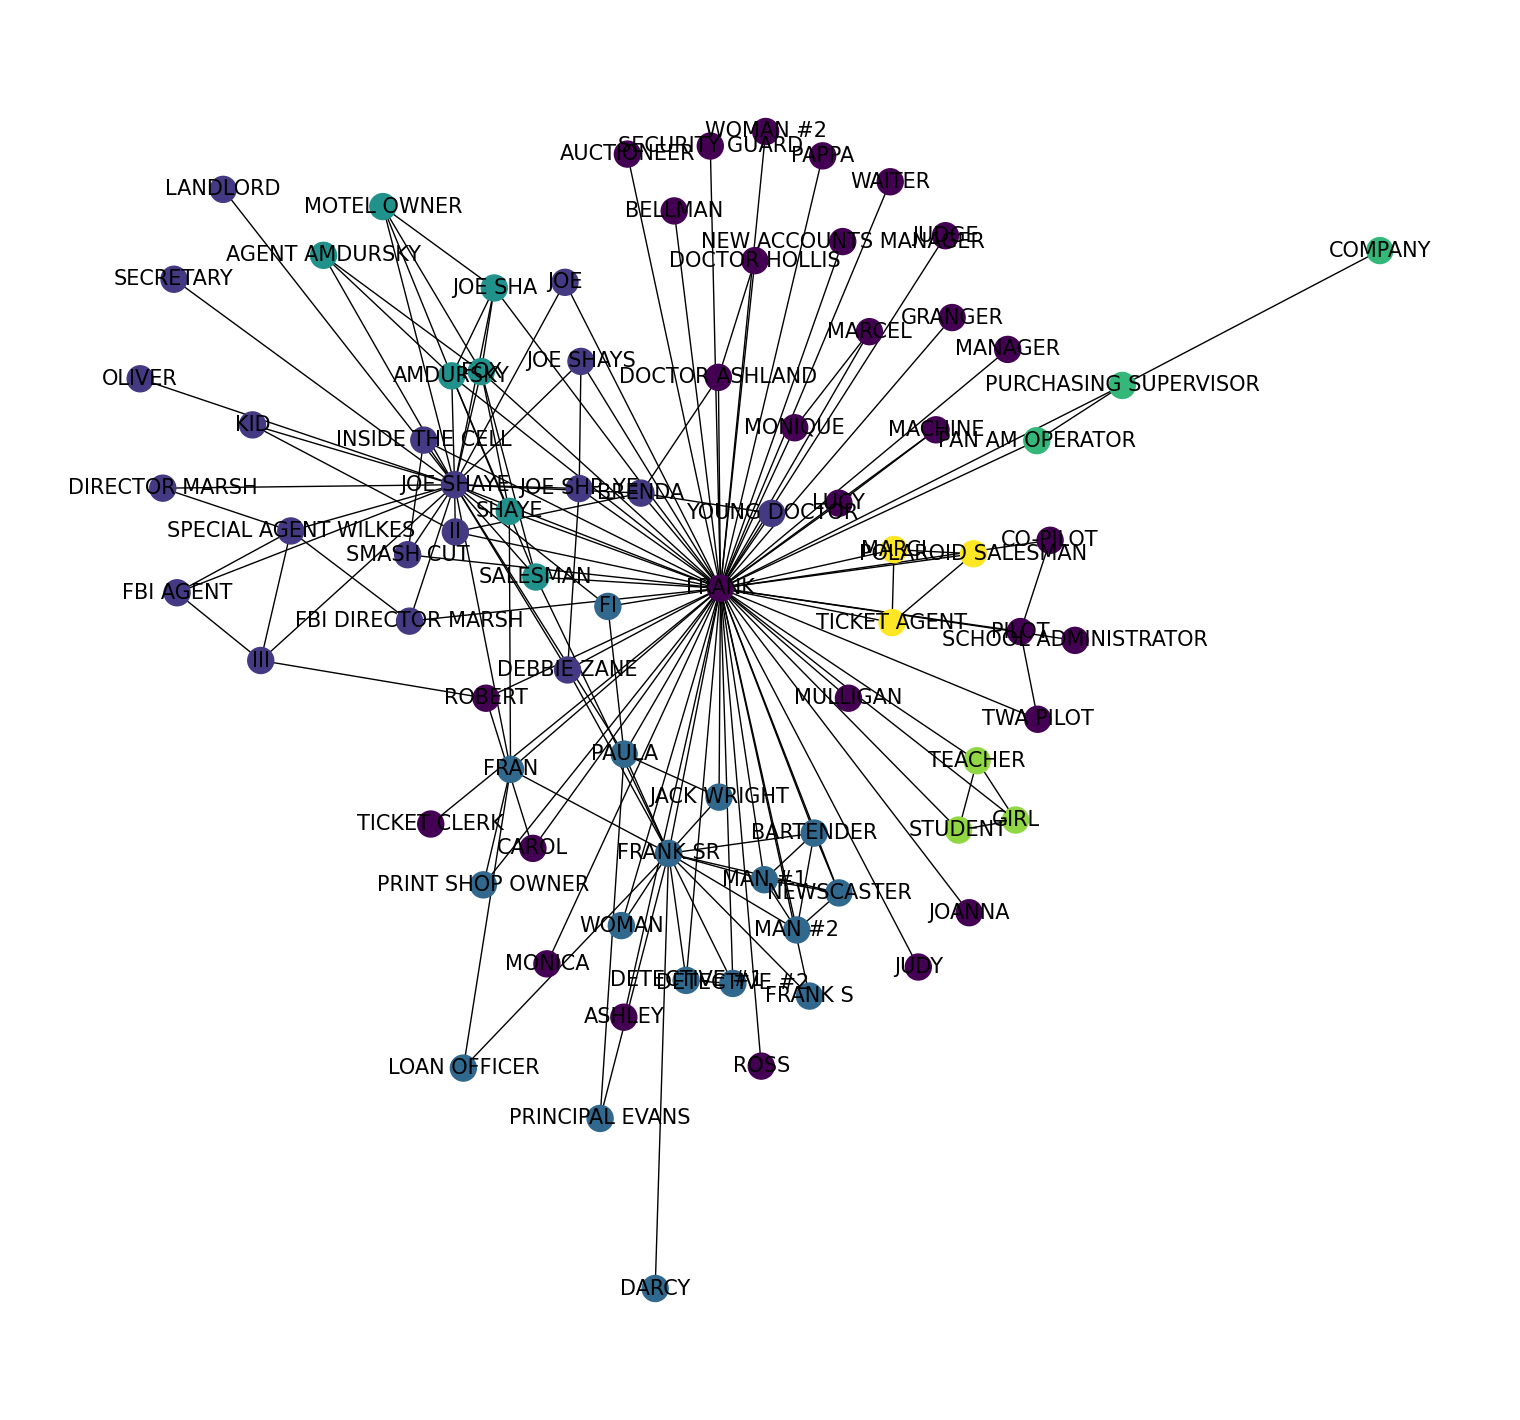

In [ ]:

# Partition map for the modularity optimization partition
partition_map = {}
for idx, cluster_nodes in enumerate(partition_mo):
    for node in cluster_nodes:
        partition_map[node] = idx



# Assign colors to each group
node_colors = [partition_map[n] for n in G.nodes]

# Draw the graph and the communities
plt.figure(figsize=(15, 14))
pos = nx.spring_layout(G, seed=42)  # Layout for the nodes
#plt.title("Catch Me If You Can Social Network with Modularity Optimization Partitions")
nx.draw(G, pos, node_color = node_colors, labels= nx.get_node_attributes(G, "label"), node_size=350, font_size= 15)

In [ ]:
nx.set_node_attributes(G,partition_map,'Community_mod')
nx.write_gexf(G, "test.gexf")

#### Optional 5: NMI-Scores and similarity

The Normalized Mutual Information (NMI) scores are a measure of similarity between pars of partitions of a network. The range of scores reaches from 0 to 1, where 0 indicated no mutual information (no shared partitions) and 1 indicates that they perfectly share the partitions.  
Since we do not know the real communities, we do not have a benchmark but it is still possible to use this index to compare the different results we have obtained by looking at the NMI for each pair of predicted partitions.

In [ ]:
partitions= [partition_br, partition_mo, partition_lp]

# Function to create labels to mark groups
def create_labels(partition, max_label):
    partition_map_labels = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map_labels[node] = idx
    # Creating the label array
    label_array = [partition_map_labels.get(node, -1) for node in range(max_label + 1)]
    return label_array

# Determine the maximum label present in all partitions to differentiate between the groups
max_label = max(max(max(cluster) for cluster in partition) for partition in partitions)


# Calculating the NMI scores
nmi_scores = {}

# Creating label arrays for each partition
label_arrays = [create_labels(partition, max_label) for partition in partitions]

# Calculating NMI for each unique pair
for i in range(len(label_arrays)):
    for j in range(i + 1, len(label_arrays)):
        nmi = normalized_mutual_info_score(label_arrays[i], label_arrays[j])
        nmi_scores[(i+1, j+1)] = nmi

nmi_scores

{(1, 2): 0.6563830856876618,
 (1, 3): 0.5116966216469897,
 (2, 3): 0.5895540590601412}

The score between the first and second partition is relatively high with 0.65, indicating that they share a substantial part of their partitions, but there are still a fair amount of differences
The score between the first and the third one is relatively moderate to low, showing that while they do share some smilarities, they are very different
The score between the second and the third one is moderate and (usually, due to the indeterminent nature of label propagation) higher than the privious one. There are still notable differences, but there is a moderate amount of overlap.

## WEEK 7

### 0. Preparing Graph by Deleting Loops

In [ ]:
# 0) Preprocess the graph

G.remove_edges_from(nx.selfloop_edges(G)) #Removing all of the self-loops within the graph

#the largest community doesn't need to be found because everybody is connected through somebody (by looking at graph)

The code above delets all of the self loops withing the Catch Me if You Can social network.

### 1. Creating a function that computing the Common Neighbors Index and Jaccard Index

In [ ]:
def indices(graph):
    non_edges = list(nx.non_edges(graph)) #seperate only nodes that aren't connected, as we're trying to find missing links

    non_edges_with_names = [(graph.nodes[u]['label'], graph.nodes[v]['label']) for u, v in non_edges]
    #the above converts indeces to name values, so I don't have to go to the code to check the names
    #it will be much easier for me to comment later on if I know the names

    ji = nx.jaccard_coefficient(graph, non_edges) #Jaccard Index is calculated very easily by using the nx library and the graph

    # Create a list of Jaccard Index values with corresponding node pairs
    ji_values = [(u, v, j) for u, v, j in ji] #using list comprehension create a list of all of the JI values, so the data frame is easy to build

    cn_values = [len(list(nx.common_neighbors(graph, u, v))) for u, v in non_edges]
    #common neighbors is a bit more difficult, as the CN nx function returns a list of all of the neighbors, but we only need the length

    # Create DataFrame
    dataframe = pd.DataFrame({ #creating the data frame, so you have the two nodes, their CN values and their JI value as the columns
        'Two Nodes': non_edges_with_names,
        'CN': cn_values,
        'JI': [j for u, v, j in ji_values] #only need the third value of the tuple as the syntax is (node1, node2, JI value)
    })

    return dataframe


df_indices = indices(G) #calculating all of the indicies and returning the dataframe, as shown above in the function

The function above returns a dataframe with all of the code above explained. I did not print the dataframe, as the data would be way too long.

### 2. Finding the Arithmetic Mean & Scaling Data

In [ ]:
def min_max_scale(data): #use the min_max_scale function taught in scall to rescale the data
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Compute the mean
df_indices['mean'] = ((min_max_scale(df_indices['CN']) + min_max_scale(df_indices['JI'])) / 2.0)
#compute the mean by adding the rescaled values together and dividing by two (also add them to the dataframe)

The above code scales all of the data and then find the arithmetic mean by diving the two indices by two.

### 3. Identifying the Top 5 for each Index

The code below finds the top 5 missing links for each index and then prints them out.

In [ ]:
def top_missing_links(df, column): #create a method to find the top 5 missing links
    top5 = df.nlargest(5, column) #pandas nlargest method returns the top whatever (our case 5) largest rows based on column
    top5 = top5.reset_index(drop=True)  #Reset the index to start from 0 and drop the old index
    top5.index += 1  #Start index from 1 instead of 0 to match the ranking
    return top5

cn_top5 = top_missing_links(df_indices, 'CN') #Top 5 missing links - CN
ji_top5 = top_missing_links(df_indices, 'JI') #Top 5 missing links - JI
mean_top5 = top_missing_links(df_indices, 'mean') #Top 5 missing links - mean


# Printing out the top 5 missing links below
print("Top 5 missing links based on CN with names:")
print(cn_top5)
print("\nTop 5 missing links based on JI with names:")
print(ji_top5)
print("\nTop 5 missing links based on mean score with names:")
print(mean_top5)

Top 5 missing links based on CN with names:
               Two Nodes  CN        JI      mean
1  (FRANK SR, JOE SHAYE)   5  0.125000  0.562500
2   (FRANK, MOTEL OWNER)   4  0.059701  0.429851
3    (JOE SHA, SALESMAN)   4  0.666667  0.733333
4       (JOE SHA, SHAYE)   4  0.666667  0.733333
5      (SALESMAN, SHAYE)   4  0.666667  0.733333

Top 5 missing links based on JI with names:
              Two Nodes  CN   JI  mean
1  (ASHLEY, AUCTIONEER)   1  1.0   0.6
2     (ASHLEY, BELLMAN)   1  1.0   0.6
3     (ASHLEY, GRANGER)   1  1.0   0.6
4      (ASHLEY, JOANNA)   1  1.0   0.6
5       (ASHLEY, JUDGE)   1  1.0   0.6

Top 5 missing links based on mean score with names:
               Two Nodes  CN        JI      mean
1    (JOE SHA, SALESMAN)   4  0.666667  0.733333
2       (JOE SHA, SHAYE)   4  0.666667  0.733333
3      (SALESMAN, SHAYE)   4  0.666667  0.733333
4  (CO-PILOT, TWA PILOT)   2  1.000000  0.700000
5       (FRANK S, WOMAN)   2  1.000000  0.700000


The results do make sense, as the results are a mix of the main characters, such as Frank or Frank Sr and side characters
which are isolated and mostly used for one scene. This makes sense as characters who only have one scene and interact with
other people, but not necessarily all of them, are likely to have a Jaccard Index value of one, which skyrockets their value.
The main characers show up in multiple different scenes and interact with a lot of characters, so they are bound to have a lot of common neighbors
even with side characters, such as the motel owner because they have just met so many people. Ashley is seen everywhere
for the top 5 JI values and I even forgot who she was and had to look her up. Finally, the mean score is also filled with
 mostly side characters and one significant character, Frank Sr. This to me shows that the movie had their interactions
 done well and there aren't any really significant missing links of people that should've interacted with one another

### 4. Inventing a new index score

 My new index score that I invented is called Extended Common Neighbor Index (ECNI). ECNI calculates the sum of the direct common neighbors between two nodes and the common neighbors between each pair of their respective neighbors, without considering the original nodes (u and v). I think that this score will help to show just how important a specific character is and will help to highlight missing links of important and main characters, rather than of just side ones.

In [ ]:
def extended_common_neighbors(graph, u, v):

    common_neighbors = set(nx.common_neighbors(graph, u, v)) #initialize a set of all common neighbors between the two nodes
    extended_neighbors_count = 0 #set the extended_neighbors_count to 0 and we will update it later on

    # Calculate common neighbors of each pair of neighbor's neighbors
    for n1 in nx.neighbors(graph, u): #we have to do a loop within a loop, so each neighbor is checked with the next one
        for n2 in nx.neighbors(graph, v):
            if n1 != v and n2 != u and n1 != n2:  # Avoid counting the original nodes or the same neighbor twice
                extended_neighbors_count += len(set(nx.common_neighbors(graph, n1, n2))) #if all works well, add the extended_neighbors to the count

    return len(common_neighbors) + extended_neighbors_count #return both the common neighbors + extended_neighbors count

def calculate_ecni_top5(graph):
    non_edges = list(nx.non_edges(graph)) #seperate only nodes that aren't connected again
    non_edges_with_names = [(graph.nodes[u]['label'], graph.nodes[v]['label']) for u, v in non_edges]  #turning number nodes into names instead

    #calculate revised ECNI for each pair of nodes that aren't connected already
    ecni_scores = [(u, v, extended_common_neighbors(graph, u, v)) for u, v in non_edges]

    #sort the scores and select the top 5
    ecni_scores.sort(key=lambda x: x[2], reverse=True) #sort based on the 2nd position within the tuple, which is the ecni score
    top5_ecni_scores = ecni_scores[:5] #only take top 5 values

    #create a DataFrame for the top 5 scores with node labels
    top5_dataframe = pd.DataFrame({
        'Two Nodes': [(graph.nodes[u]['label'], graph.nodes[v]['label']) for u, v, _ in top5_ecni_scores],
        'ECNI': [score for _, _, score in top5_ecni_scores]
    })

    #adjust the DataFrame index to start from 1
    top5_dataframe.index = range(1, len(top5_dataframe) + 1)

    return top5_dataframe

print(calculate_ecni_top5(G))

                       Two Nodes  ECNI
1          (FRANK SR, JOE SHAYE)   515
2           (FRANK, MOTEL OWNER)   403
3        (AGENT AMDURSKY, FRANK)   309
4  (FRANK, SPECIAL AGENT WILKES)   254
5                   (FRANK, III)   220


I calculated common neighbors for each node and pair. I calculated and revised ECNI for each one of them aren't connected. We did top 5 rankings and as expected Frank is coming on top with 515 ECNI. It is not something surprising because one of the main characters should have the most common neighbors out of all.

## WEEK 9

### A) Programming preferential attachment by hand using only basic functions of networkx such that 1 node appears by stage and creates m links.

The code below programs preferential attachment with basic functions and creates m links, also printing out the graph at the end. The order that the graph is created in is based on the alphabetical order of the labels, so the first two nodes are AGENT AMDURSKY and AMDURSKY.

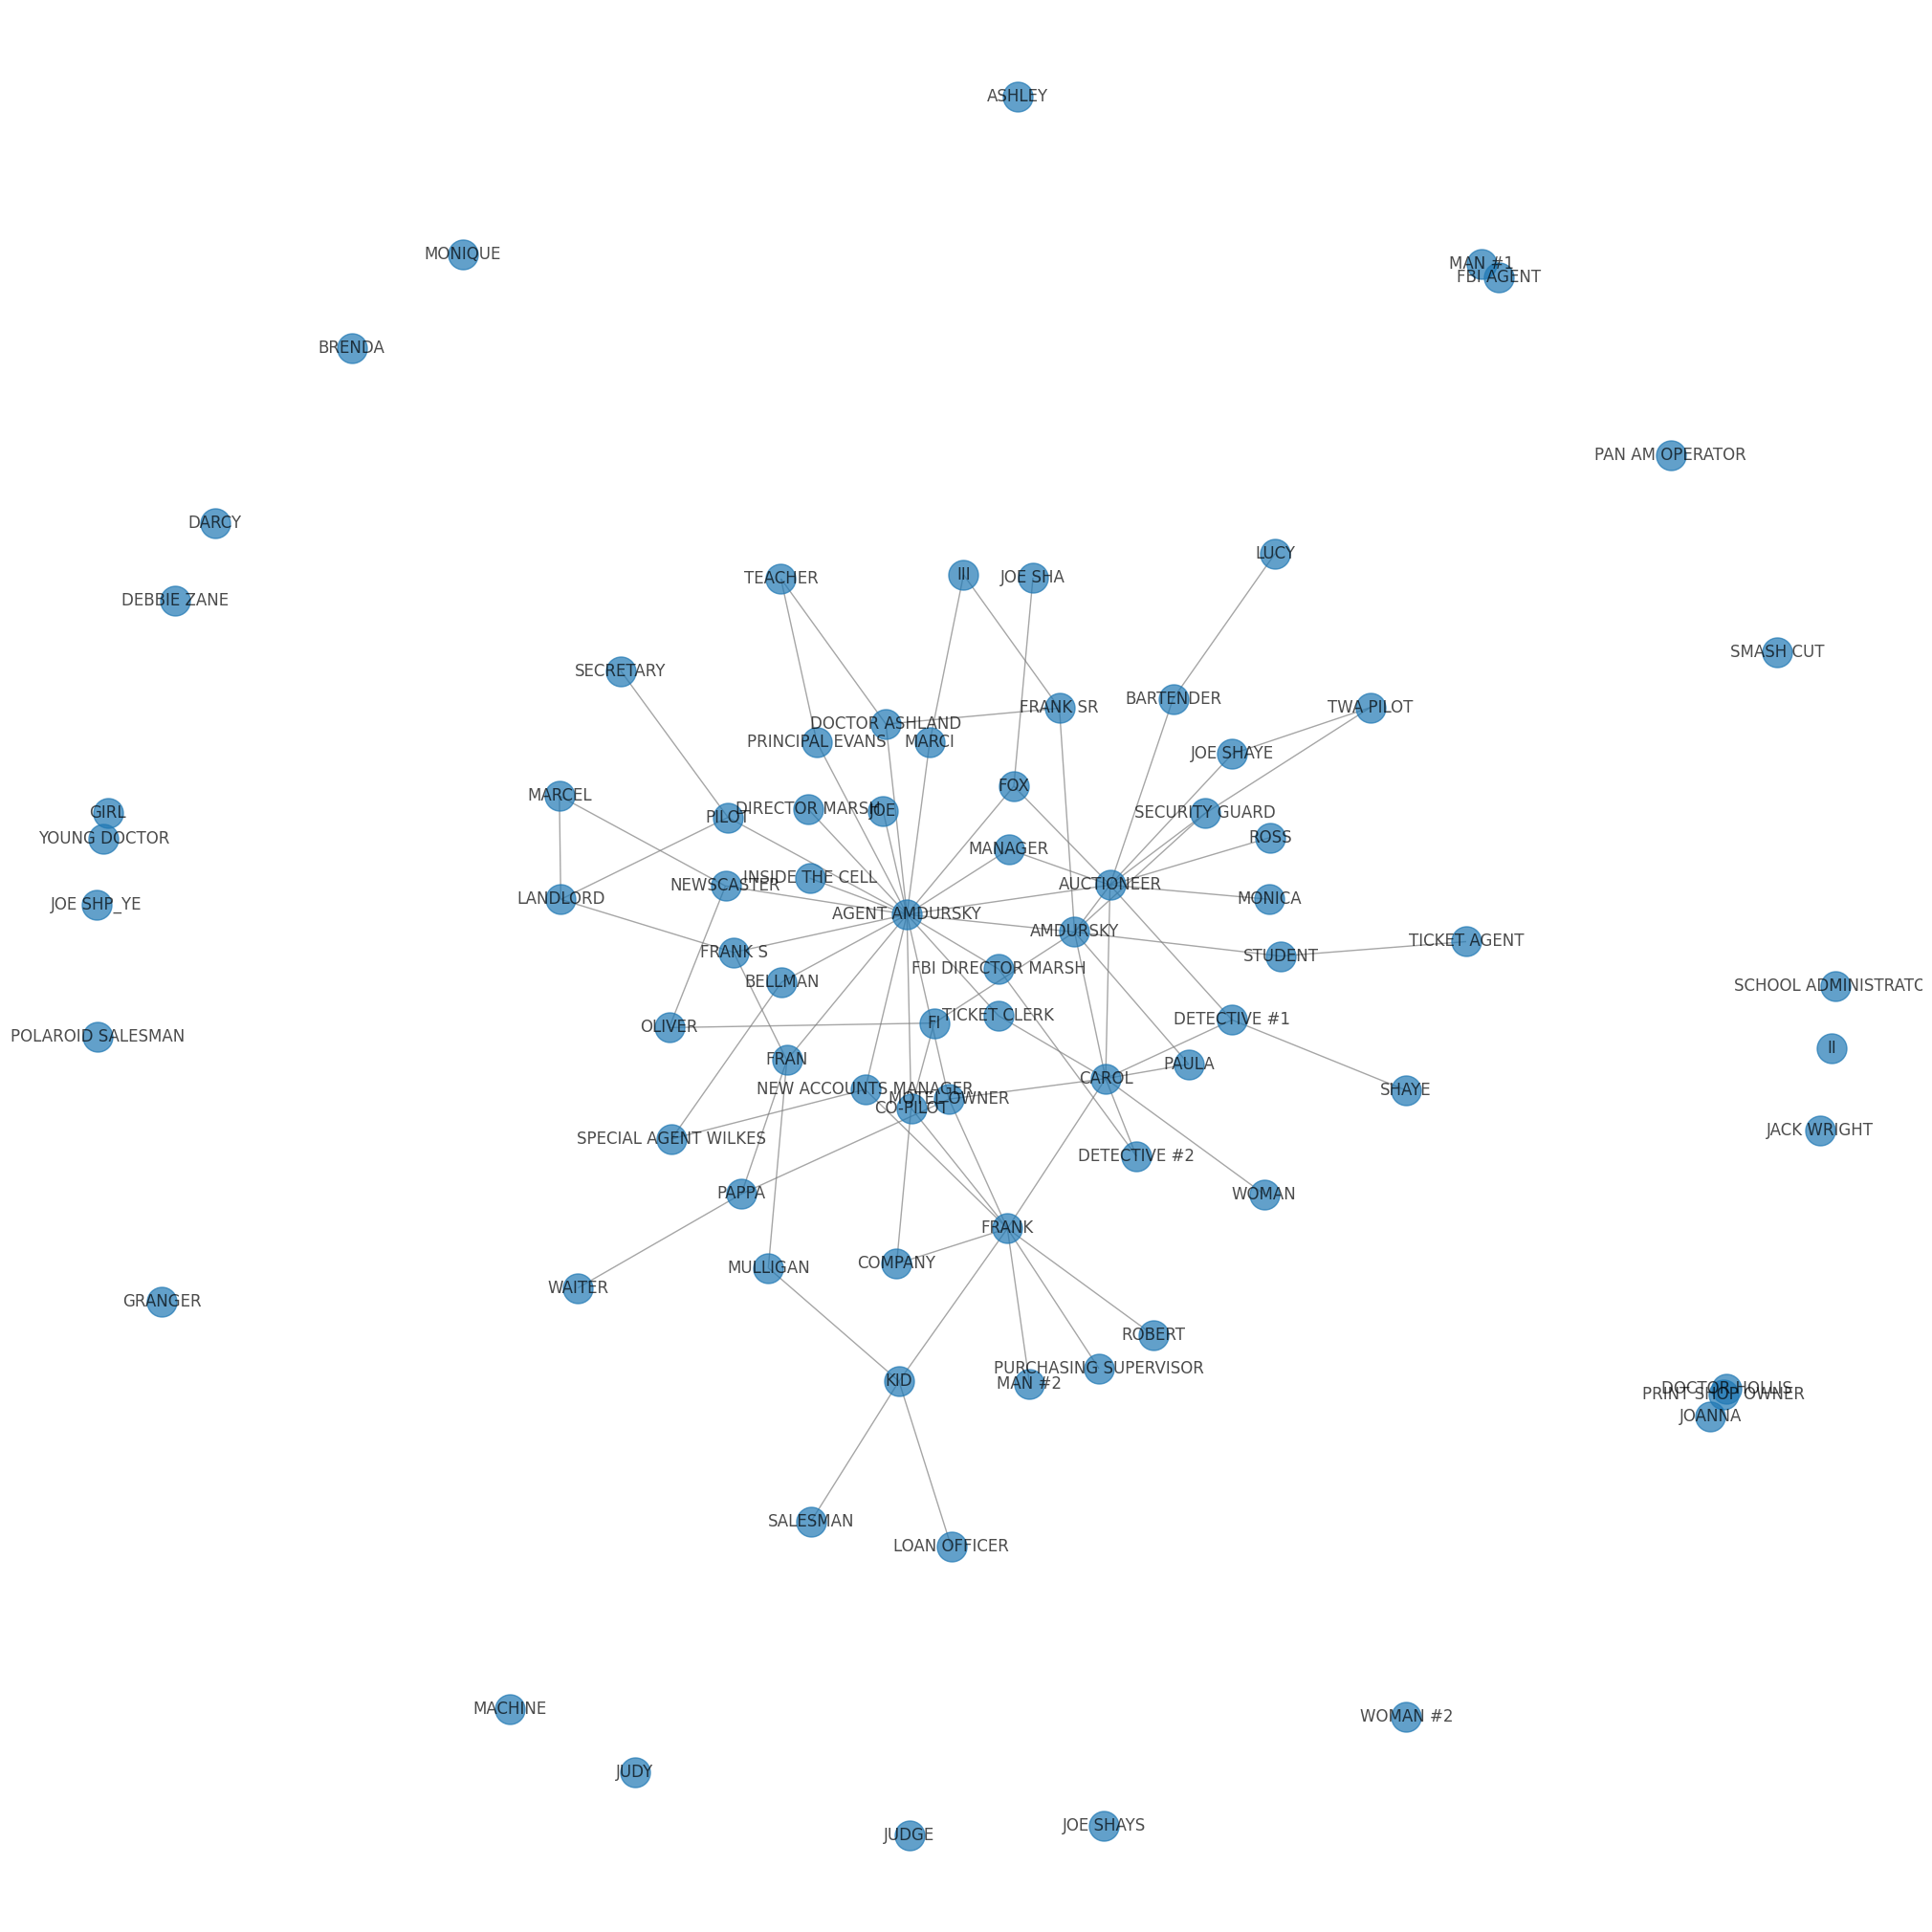

In [ ]:
import random

def preferential_attachment(nodes_df):
    H = nx.Graph() # Initialize an empty graph

    first_node_idx = nodes_df.iloc[0]['# index']
    first_node_lbl = nodes_df.iloc[0][' label'].strip()

    # Add the first node
    H.add_node(first_node_idx, label=first_node_lbl)

    #A function to calculate the probability of attaching to each node
    def attachment_probability(H, new_node): #Uses the graph and a node to do that
        total_degree = sum(dict(H.degree()).values()) #Calculates a total degree (denominator), which is the some of degrees of every node
        if total_degree == 0: #Create an edge case for the very first iteration
            return {n: 1 for n in H}  #Return a probability of 1, which means that node 0 will 100% connected to node 1
        else:
            return {n: H.degree(n)/total_degree for n in H} #return a dictionary of probabilities of new node attaching to every node currently in graph H

    #Iteratively add all of the nodes to the graph
    for _, row in nodes_df.iterrows():
        idx = row['# index']  # Use index as the identifier throughout
        lbl = row[' label'].strip()
    # Check if the node with this index already exists before adding
        if idx not in H:
            H.add_node(idx, label=lbl)  # Add node with index as identifier

        probs = attachment_probability(H, idx)  # Calculate attachment probabilities the currently added node and the rest of the graph

        for node, prob in probs.items(): #Itterate over the dictionary to get their probabilities for every nodes
            if node != idx and random.random() < prob: #Generates a random number between 0 and 1 and compare to gotten probability
                H.add_edge(idx, node) #If this random number is less than prob, we create a link

    return H

G2 = preferential_attachment(nodes_df) # Create the graph using the adjusted preferential attachment function

#Print out the graph using similar code to the one done for the original graph

pos = nx.kamada_kawai_layout(G2) #Use a layout which tries to fix overlapping nodes and edges

center = np.array([0, 0]) #Identify the center of the layout because we cannot use the pregiven node positions, as the graph is random now

radius = 1.5 * max(np.linalg.norm(np.array(list(pos.values())) - center, axis=1)) #define the radius of the periphery where I want to place nodes with 0 links

#place unconnected nodes on the periphery
for node in G2.nodes():
    if G2.degree(node) == 0:
        angle = np.random.rand() * 2 * np.pi  #random angle for each unconnected node, so that they aren't all stuck in one place
        pos[node] = center + radius * np.array([np.cos(angle), np.sin(angle)]) #add the node to that position

#draw the graph
plt.figure(figsize=(20, 20))
nx.draw(G2, pos, with_labels=True, labels=nx.get_node_attributes(G2, "label"), node_size=500, font_size=12, edge_color="gray", alpha=0.7)
plt.show()


Each time the code is ran, the graph is random, due to the probability idea of preferential attachment. That is why some nodes might be overlapping of visible, since their position changes every single iteration.

### B) Computing the average degree in my graph

The code below computes the average degree of the graph or the measurement of the average number of connections that each node has.

In [ ]:
#Calculate the average degree
average_degree = sum(dict(G2.degree()).values()) / G2.number_of_nodes() #
#sum of the degrees of all nodes in the graph divided by the total number of nodes

print("The average degree for this specific graph iteration is " + str(average_degree) + " for this graph.") #printing out the average degree


The average degree for this specific graph iteration is 2.0 for this graph.


This outputted value also varies from graph to graph since the edges are based on probability, but every time the graph is ran and the average degree outputted, something around the value of two is achieved.

### C) Choosing a parameter m, so that an average degree in the random graph is the closest to the one of our graph.

The average degree for our graph is 3.951219512195122, so we are trying to find an m value somewhere within that range.


In [ ]:
def find_optimal_m(num_nodes, target_avg_degree): #create a function that will find the smallest difference between average degrees
    closest_m = None
    min_diff = float('inf')
    avg_degree_final = 0

    for m in range(1, num_nodes): #Iterating through every possible m value
        G = nx.barabasi_albert_graph(num_nodes, m) #Generate each graph using the Barabási–Albert model, which means prefferential attachment
        avg_degree = sum(dict(G.degree()).values()) / num_nodes #Calculate the average degree of the graph

        diff = abs(avg_degree - target_avg_degree) # Check the difference with the target average degree
        if diff < min_diff: #if the difference is smaller, we update our final variables
            min_diff = diff
            closest_m = m
            avg_degree_final = avg_degree

    return closest_m, avg_degree_final

# Number of nodes in the graph
num_nodes = 82 #our graph has 82 nodes, so our values are going to be from 1 possible link to 81 possible links
target_avg_degree = 3.951219512195122

optimal_m, avg_degree_final = find_optimal_m(num_nodes, target_avg_degree)
print("The optimal value of m is " + str(optimal_m) + " which results in an average degree of " + str(avg_degree_final))

The optimal value of m is 2 which results in an average degree of 3.902439024390244


The code above gives as us an m value of two, with a difference of only 0.0487804878, which is very little (1.25% difference).

### D) Compare the two graphs in terms of: Diameter, Degree Distributions and Transitivity


#### Diamater Comparison

Since the graph built with the adjusted preferential attachment function is not connected, we first extract the main component in order to compare the diameters.


In [ ]:
# Creating the largest component for the second graph
largest_cc_2 = max(nx.connected_components(G2), key=len)
G2_main=G2.subgraph(largest_cc_2)



In [ ]:
# Computing the diameters for the 2 Graphs
G2_diamater = nx.diameter(G2_main)
G1_diameter = nx.diameter(G)

print(f"The diameter of the first Graph is {G1_diameter}, while the diameter of the largest component of the second is {G2_diamater}")

The diameter of the first Graph is 4, while the diameter of the largest component of the second is 6


The diameter of the second is 2/3 of the first one.

#### Degree Distributions comparison

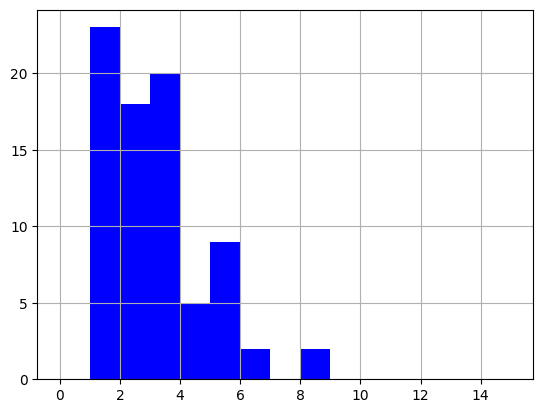

In [ ]:
data_degree=[G.degree(n) for n in G.nodes()] # List of degrees
pt = plt.hist(data_degree, bins=range(16),facecolor='blue') #histogram of the dataset data_centralities
plt.grid(True)
plt.show()



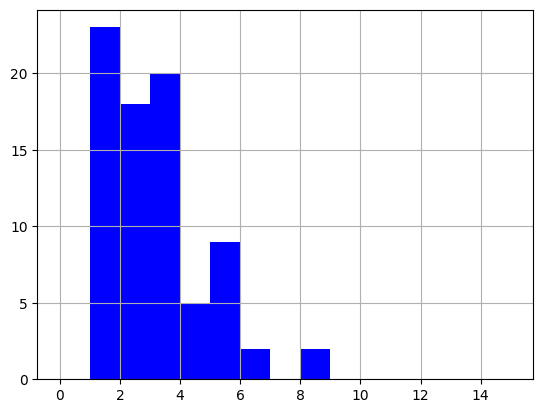

In [ ]:
data_degree_2=[G2_main.degree(n) for n in G2_main.nodes()] # List of degrees
pt = plt.hist(data_degree, bins=range(16),facecolor='blue') #histogram of the dataset data_centralities
plt.grid(True)
plt.show()


The degree distributions are almost the same

#### Transitivity comparison

In [ ]:
transitivity_G1 = nx.transitivity(G)
transitivity_G2 = nx.transitivity(G2_main)

print(f"Transitivity of Graph 1: {transitivity_G1}")
print(f"Transitivity of Graph 2: {transitivity_G2}")

Transitivity of Graph 1: 0.11465603190428714
Transitivity of Graph 2: 0.07075471698113207


 The lower transitivity of Graph 2 suggests that it does not replicate the clustering characteristics of Graph 1 as closely as it might need to

The fact that the degree distributions are similar but the transitivity is different suggests that the overall patterns of node connections are similar in a broad sense, but the specific ways in which nodes form triangles or clusters are different.

##Week 10


###a. Choosing and building a propagation model



"Catch Me If You Can" revolves around deception, crime, and investigation. Therefore it would be interesting to examine some kind of propagation model which can simulate, how suspicions, rumors, or information about Frank's or others' activities spread among other characters.
Hence, the Independent Cascade Model, is particularly suitable.

In this model, each activated node has a single chance to activate each of its inactive neighbors in the next step. It's a good model for situations where information or influence spreads in a cascading manner, with each person influencing their immediate connections.

as input in the function, we will have the Graph and p (probability of a node activating another node), the list of initially active characters and the number of iterations we want to simulate.
The active characters will be plotted in red, the ones which were only activated in the last iteration will be yellow, and the inactive nodes will be blue.

In [ ]:
def independent_cascade_model_with_circular_plot(G, p, initial_active, iterations):
    """
    Simulates the Independent Cascade Model on a given graph with circular plotting after each iteration.

    Parameters:
    G (networkx.Graph): The graph representing the social network.
    p (float): The probability of a node activating another node.
    initial_active (list): List of initially active nodes.
    iterations (int): Number of iterations to run the simulation.
    """
    # Initialize all nodes to inactive
    for node in G.nodes():
        G.nodes[node]['status'] = 'inactive'

    # Set initial active nodes
    for node in initial_active:
        G.nodes[node]['status'] = 'active'

    # Color mapping
    color_map = {'inactive': 'blue', 'active': 'red', 'newly_active': 'yellow'}

    # Plot initial state
    colors = [color_map[G.nodes[node]['status']] for node in G.nodes()]
    plt.figure(figsize=(12, 10))
    nx.draw_circular(G, node_color=colors, labels= nx.get_node_attributes(G, "label"), font_weight='bold', node_size=150)
    plt.title("Initial Activation")
    plt.show()

    # Begin iterations
    for i in range(iterations):
        new_activations = []

        # Check each node for possible activation
        for active_node in [node for node in G.nodes() if G.nodes[node]['status'] == 'active']:
            for neighbor in G.neighbors(active_node):
                if G.nodes[neighbor]['status'] == 'inactive':
                    if random.uniform(0,1) <= p:
                        new_activations.append(neighbor)


        # Update status of newly activated nodes
        for node in new_activations:
            G.nodes[node]['status'] = 'newly_active'

        # Plot current state
        colors = [color_map[G.nodes[node]['status']] for node in G.nodes()]
        plt.figure(figsize=(12, 10))
        nx.draw_circular(G, node_color=colors, labels= nx.get_node_attributes(G, "label"), font_weight='bold', node_size=150)
        plt.title(f"Iteration {i+1}")
        plt.show()

        # Update status from newly_active to active for the next iteration
        for node in new_activations:
            G.nodes[node]['status'] = 'active'



Now we call the function, the parameters can be changed as desired. Here we choose a p of 10%, Frank as the starting node and we examine 10 iterations.

In [ ]:
initial_active_names = ["FRANK"] #input the name of the people you want to start with here
p = 0.1
iterations = 10

initial_active = [list_of_names.index(name) for name in initial_active_names]  # This will be the index which is needed for the algorithm

independent_cascade_model_with_circular_plot(G, p, initial_active, iterations) #call the function here

Now we want to go over different scenarios where the origin of the information are different characters. This will tell us which person is most likely to be able to influence other people in the social network.


In [ ]:
def independent_cascade_active_end(G, p, initial_active, iterations): #main workings of the function are explained above in the graphing function
    """
    Runs the Independent Cascade Model for a given number of iterations and
    returns the total number of active nodes at the end.
    """
    for node in G.nodes():
        G.nodes[node]['status'] = 'inactive'

    for node in initial_active:
        G.nodes[node]['status'] = 'active'

    for _ in range(iterations):
        new_activations = []
        for active_node in [node for node in G.nodes() if G.nodes[node]['status'] == 'active']:
            for neighbor in G.neighbors(active_node):
                if G.nodes[neighbor]['status'] == 'inactive':
                    if random.uniform(0, 1) <= p:
                        new_activations.append(neighbor)

        for node in new_activations:
            G.nodes[node]['status'] = 'newly_active'

        for node in new_activations:
            G.nodes[node]['status'] = 'active'

    return sum(1 for node in G.nodes() if G.nodes[node]['status'] == 'active')

def comparison_independent_cascade(G, p, iterations):
    """
    Compares the effect of different initial active nodes on the final number of active nodes
    after running the independent cascade model.
    """
    data_y = []  # Store the final number of active nodes for each initial node

    for node in G.nodes():
        final_active_count = independent_cascade_active_end(G.copy(), p, [node], iterations)
        data_y.append(final_active_count)

    return data_y






Now we use the function above to plot the graph with parameter p of 0.1 and 5 iterations

In [ ]:

independent_cascade_results = comparison_independent_cascade(G, 0.1, 4)

plt.figure(figsize=(30, 10))  # Set the figure size as needed
plt.xticks(rotation=60)
plt.plot(list_of_names, independent_cascade_results)
plt.show()


In order to minimize that the results we see are just by mere chance, we plot
the graph multiple times to examine consitent trends.

In [ ]:


independent_cascade_results = comparison_independent_cascade(G, 0.1, 4)
independent_cascade_results2 = comparison_independent_cascade(G, 0.1, 4)
independent_cascade_results3 = comparison_independent_cascade(G, 0.1, 4)



plt.figure(figsize=(30, 10))  # Set the figure size as needed
plt.xticks(rotation=60)
plt.plot(list_of_names, independent_cascade_results)
plt.plot(list_of_names, independent_cascade_results2)
plt.plot(list_of_names, independent_cascade_results3)

plt.show()


Unsurprisingly, Frank is the character which has the consitently highest amount of propagation as a starting node. This is the case, as he is the node with the highest degree and that he is the most central figure according to many centrality measures.

Frank has a degree of 67. The social network in total has 82 nodes so he is connected to over 80% of the graph. This means that in every iteration, he has the abilit to try to activate 8 out of 10 people in the social network.

As well as that, we have established, that he has the highest pagerank and the highest betweenness centrality of the whole network. This also increase his influence.

Betweenness Centrality: Nodes that frequently lie on the shortest paths between other nodes in the network can control the flow of information. If information must pass through certain nodes to spread across the network, these nodes can be crucial for propagation, regardless of their degree.

PageRank: Nodes that are connected to other highly connected nodes can be influential, even if they don't have a high degree themselves. This measure reflects the notion that having connections to influential nodes can make a node influential as well. PageRank also considers the structure of the entire network, potentially identifying influential nodes even in the presence of hubs.

Due to these factors, it is not surprise that Frank will activate most nodes in the independent cascade model.

Right after Frank, Joe Shaye seems to also be very consistent in regards to a high number of activated nodes. This can be explained by him being the person with the second highest amount of degree with 28. Also, examining the cluster graph of week 6, we can deduct that he is the second most central figure and connects to many different clusters.

Further examining the plot, we can see that the amount of active nodes by the end of the iterations can vary greatly between the different characters and even for each character between the different iterations.

The former is, as mentioned, because of the difference in the centralities and the degrees.
The latter is due to chance alone. As well as that, if the node is sucessful in activating a node with a high degree and high centrality such as Frank, it will greatly increase the number of activated nodes in the next iterations.


## CONCLUSION

The network analysis of "Catch Me If You Can" reveals a tightly woven social structure, characterized by efficient communication pathways and a small-world phenomenon. This tight interconnectivity is largely due to the central roles of Frank and Joe Shay, who act as linchpins in the network, connecting various groups and individuals.

The analysis, through metrics like average degree, density, average distance, and diameter, illustrates a network where connections, though sparse, are significant and impactful. The small diameter and low average shortest path length highlight the efficiency of the network's structure, allowing for rapid information dissemination and interaction among characters.

This project underscores the power of network analysis in deciphering complex narrative structures, offering a quantitative lens to understand and appreciate the intricate dynamics of character interactions. The findings not only enhance our understanding of the movie's narrative but also demonstrate the applicability of social network analysis in unraveling the essence of storytelling in cinematic works.